In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

About - Dataset:

Title: Car Sale Dataset
The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

 Car Sales

Source:

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.


Description:

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences


feature
 Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
 Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
 Customer Name: The name of the customer who purchased the car, represented as a string
 Gender: The gender of the customer, categorized as "Male" or "Female.
 Annual Income: The customer's annual income in US dollars, represented as a numeric value
 Dealer_Name: The name of the dealership selling the car, represented as a string
 Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
 Model: The specific model name of the car, such as "Corolla," "Civic," etc
 Engine: The engine type of the car, such as "V6," "I4," etc
 Transmission: The type of transmission in the car, either "Manual" or "Automatic.
 Color: The color of the car, represented as a string (e.g., "Red," "Blue")
 Price ($): The selling price of the car in US dollars
 Dealer_No: A unique identifier for each car dealer in the dataset
 Body Style: The body style of the car, such as "Sedan," "SUV," etc
 Phone: The phone number of the customer who purchased the car
 Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [4]:
#What is the average selling price of cars for each dealer, and how does it compare across different dealersE
df=pd.read_csv('/content/Car Sale.csv')
df
aa=df.groupby(['Dealer_Name'])['Price ($)'].mean().reset_index()
aa



,Dealer_Name,Price ($)
0,Buddy Storbeck's Diesel Service Inc,27217.261563
1,C & M Motors Inc,28111.755200
2,Capitol KIA,28189.703822
3,Chrysler Plymouth,27555.526400
4,Chrysler of Tri-Cities,28123.091054
5,Classic Chevy,28602.014446
6,Clay Johnson Auto Sales,27816.027113
7,Diehl Motor CO Inc,27993.929487
8,Enterprise Rent A Car,28312.580800
9,Gartner Buick Hyundai Saab,28247.621019


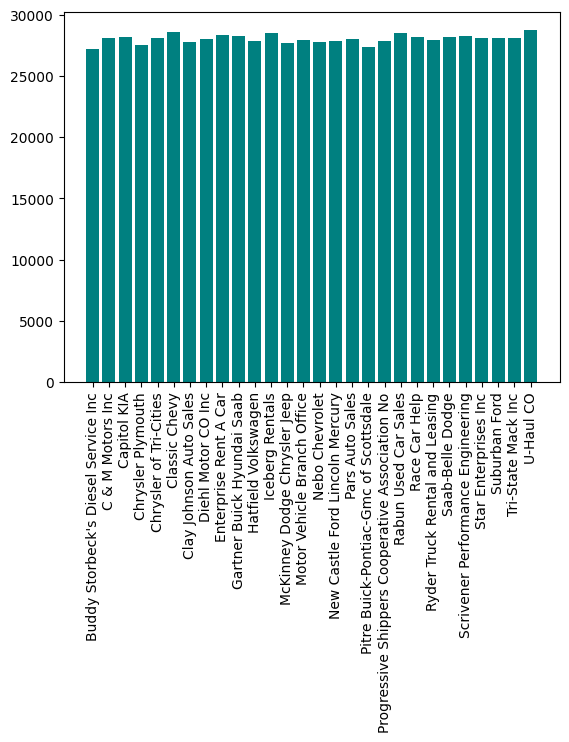

In [5]:
plt.bar(aa['Dealer_Name'], aa['Price ($)'], color='teal')
plt.xticks(rotation=90)
plt.show()

In [6]:
# Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trendsE

In [7]:
variation=df.groupby(['Company'])['Price ($)'].max()-df.groupby(['Company'])['Price ($)'].min()
variation.max()
variation[variation==variation.max()]

,Price ($)
Company,
Mercedes-B,83800


,Q1,Q3,IQR
Transmission,,,
Auto,19000.0,35500.0,16500.0
Manual,17000.0,34000.0,17000.0


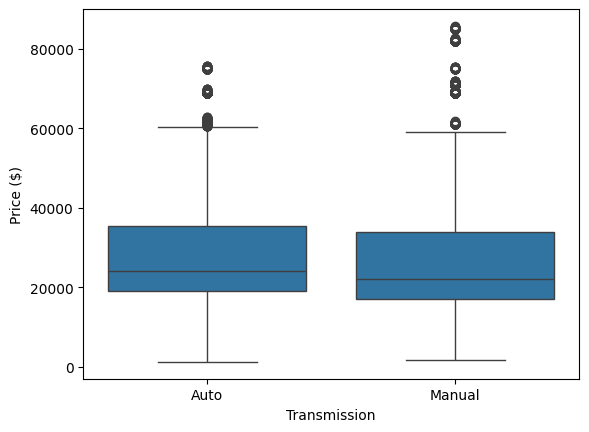

In [8]:
#What is the distribution of car prices for each transmission type, and how do the interquartile ranges compareE

sns.boxplot(x='Transmission',data=df,y='Price ($)')
q1 = df.groupby('Transmission')['Price ($)'].quantile(0.25)
q3 = df.groupby('Transmission')['Price ($)'].quantile(0.75)
iqr = q3 - q1

# Combine into one DataFrame
iqr_df = pd.DataFrame({'Q1': q1, 'Q3': q3, 'IQR': iqr})
iqr_df

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

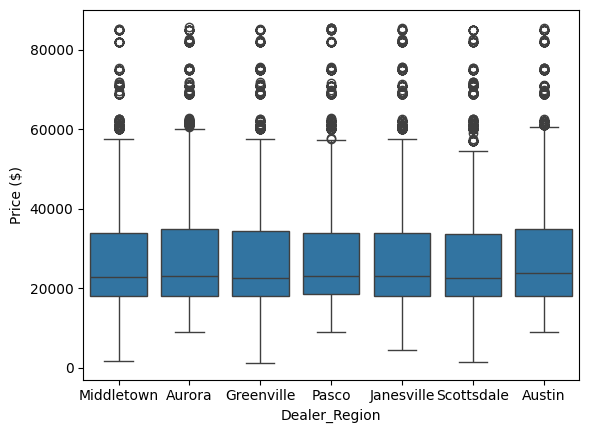

In [9]:
#= What is the distribution of car prices across different regionsE
sns.boxplot(x='Dealer_Region',y='Price ($)',data=df)

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


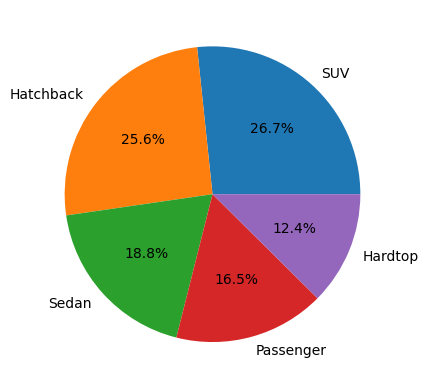

In [10]:
#What is the distribution of cars based on body stylesE
display(df['Body Style'].value_counts())
plt.pie(df['Body Style'].value_counts(),autopct='%1.1f%%',labels=df['Body Style'].value_counts().index)
plt.show()

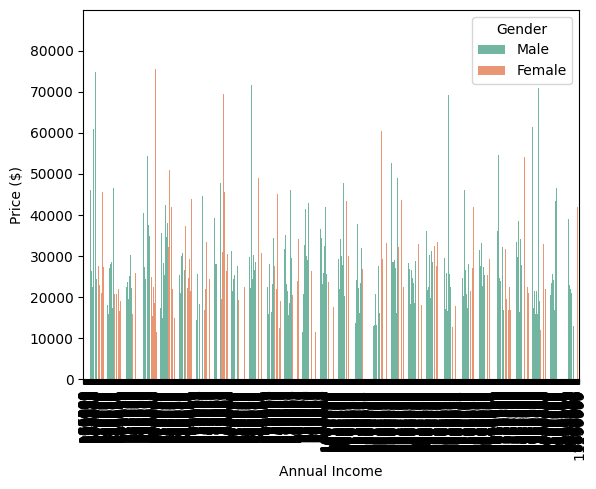

In [11]:
# How does the average selling price of cars vary by customer gender and annual incomeE
aa=df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
sns.barplot(data=aa, x='Annual Income', y='Price ($)', hue='Gender', palette='Set2')

plt.xticks(rotation=90)
plt.show()

In [12]:
#9What is the distribution of car prices by region, and how does the number of cars sold vary by regionE
import plotly.express as px
px.box(df, x='Dealer_Name', y='Price ($)', color='Dealer_Region',
              title='Distribution of Car Prices by Region',
              labels={'Price ($)': 'Price ($)'})

<BarContainer object of 23906 artists>

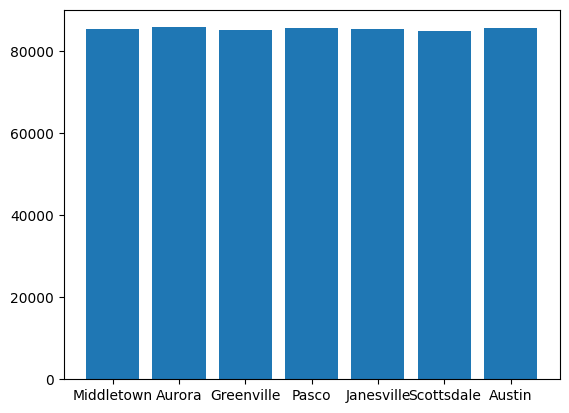

In [13]:
#9What is the distribution of car prices by region, and how does the number of cars sold vary by regionE
plt.bar(df['Dealer_Region'],df['Price ($)'])


<BarContainer object of 7 artists>

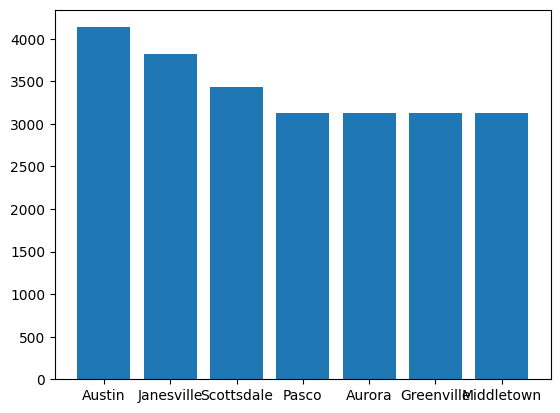

In [14]:
df.Dealer_Region.value_counts()
plt.bar(df['Dealer_Region'].value_counts().index,df['Dealer_Region'].value_counts().values)

<Axes: xlabel='Engine', ylabel='Price ($)'>

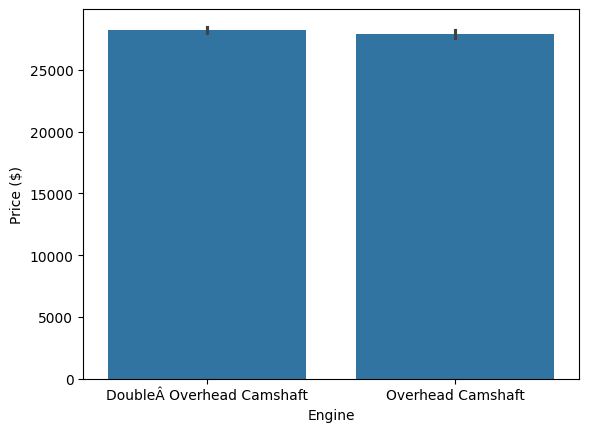

In [15]:
#I How does the average car price differ between cars with different engine sizesE
df['Price ($)'].mean()
df.groupby(['Engine'])['Price ($)'].mean()
sns.barplot(x='Engine',y='Price ($)',data=df)


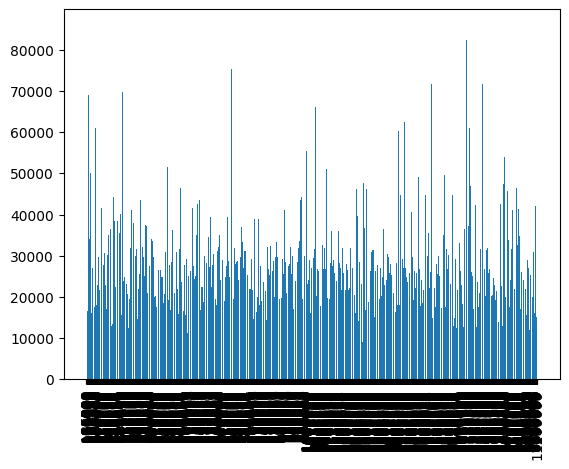

In [16]:
#How do car prices vary based on the customer’s annual income bracketE
aa=df.groupby(['Annual Income'])['Price ($)'].mean().reset_index()
aa
plt.bar(aa['Annual Income'].astype(str),aa['Price ($)'])
plt.xticks(rotation=90)
plt.show()

In [28]:
#_What are the top 5 car models with the highest number of sales, and how does their price distribution lookE
top_models=df['Model'].value_counts().head().index
top_models

Index(['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup'], dtype='object', name='Model')

In [27]:
top_model_df = df[df['Model'].isin(top_models)]
top_model_df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
69,C_CND_000070,1/4/2022,Toby,Male,13500,Clay Johnson Auto Sales,Mitsubishi,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,21000,78758-7841,Hatchback,8822935,Pasco
91,C_CND_000092,1/5/2022,Mauricio,Male,13500,Race Car Help,Dodge,Ram Pickup,Overhead Camshaft,Manual,Pale White,21001,78758-7841,Hardtop,8188037,Austin
107,C_CND_000108,1/6/2022,Noel,Male,1362000,Chrysler of Tri-Cities,Chevrolet,Prizm,Overhead Camshaft,Manual,Pale White,21200,99301-3882,Hardtop,6633882,Pasco
116,C_CND_000117,1/9/2022,Jake,Male,700000,Motor Vehicle Branch Office,Mitsubishi,Diamante,Overhead Camshaft,Manual,Black,49000,78758-7841,Hatchback,7757499,Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23868,C_CND_023869,12/30/2023,Youenn,Female,13500,Star Enterprises Inc,Volkswagen,Passat,DoubleÂ Overhead Camshaft,Auto,Pale White,31000,99301-3882,Hatchback,8231925,Scottsdale
23882,C_CND_023883,12/31/2023,Victoria,Male,501000,Suburban Ford,Chevrolet,Prizm,Overhead Camshaft,Manual,Red,22001,53546-9427,Hatchback,8455104,Janesville
23884,C_CND_023885,12/31/2023,Winnie,Male,820500,U-Haul CO,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45500,78758-7841,Hatchback,8519129,Austin
23890,C_CND_023891,12/31/2023,Joaquin,Male,2450000,Saab-Belle Dodge,Dodge,Ram Pickup,Overhead Camshaft,Manual,Pale White,20001,60504-7114,Hardtop,6172324,Aurora


In [29]:
top_model_df.groupby(['Model'])['Price ($)'].mean()

,Price ($)
Model,
Diamante,22268.303828
Passat,19600.728900
Prizm,22838.457421
Ram Pickup,27820.864230
Silhouette,29858.513382


<Axes: xlabel='Model', ylabel='Price ($)'>

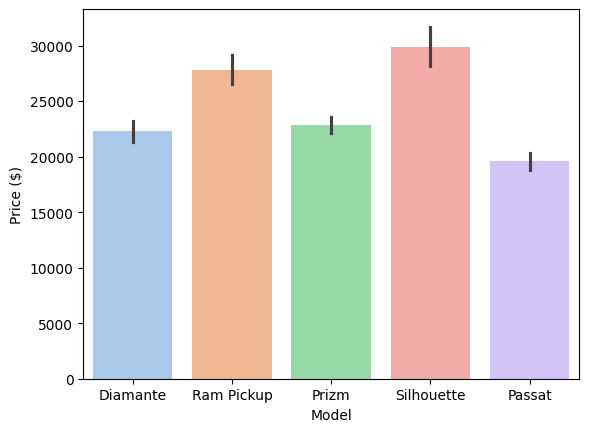

In [31]:
sns.barplot(x='Model',y='Price ($)',data=top_model_df,palette='pastel')

In [36]:
#_ How does car price vary with engine size across different car colors, and which colors have the highest price variation
df['Engine'].value_counts().reset_index()

,Engine,count
0,DoubleÂ Overhead Camshaft,12571
1,Overhead Camshaft,11335


In [39]:
df['Color'].value_counts().reset_index()

,Color,count
0,Pale White,11256
1,Black,7857
2,Red,4793


In [60]:
price_variation = df.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()
price_variation

,Engine,Color,Price ($)
0,DoubleÂ Overhead Camshaft,Black,25766.451103
1,DoubleÂ Overhead Camshaft,Pale White,30347.987460
2,DoubleÂ Overhead Camshaft,Red,27434.392314
3,Overhead Camshaft,Black,31732.967164
4,Overhead Camshaft,Pale White,24327.767694
5,Overhead Camshaft,Red,30153.405229


<Axes: xlabel='Engine', ylabel='Price ($)'>

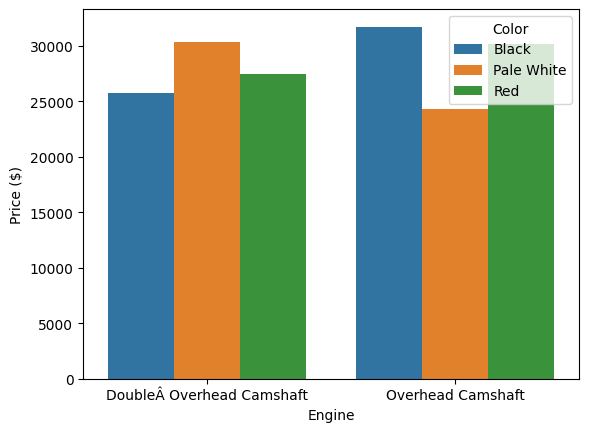

In [63]:
sns.barplot(x='Engine',y='Price ($)',data=price_variation,hue='Color')

<Axes: xlabel='Color', ylabel='variation'>

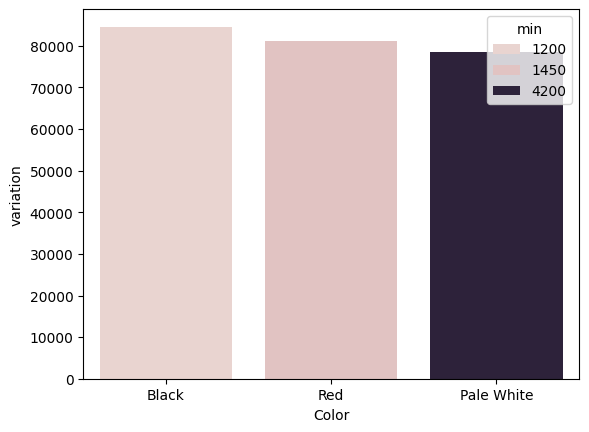

In [80]:
variation_by_color = df.groupby('Color')['Price ($)'].agg(['max', 'min'])
variation_by_color['variation'] = variation_by_color['max'] - variation_by_color['min']
variation_by_color = variation_by_color.sort_values(by='variation', ascending=False)
variation_by_color
sns.barplot(x='Color',y='variation',hue='min',data=variation_by_color)



In [87]:
#_G Is there any seasonal trend in car sales based on the date of saleE
df['Date of Sale'] = pd.to_datetime(df['Date'])
df['month']=df['Date of Sale'].dt.month
df['month'].value_counts()


,count
month,
12,3546
11,3470
9,3305
5,1895
10,1830
7,1725
6,1715
8,1705
4,1655


<Axes: xlabel='month', ylabel='Count'>

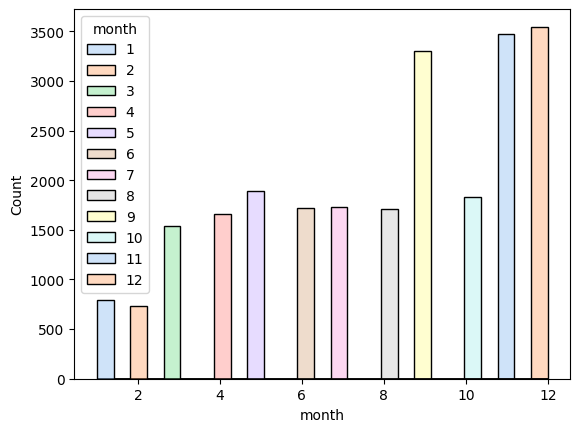

In [94]:
sns.histplot(x='month',data=df,hue='month',palette='pastel')

In [100]:
df.groupby(['month'])['Price ($)'].mean()

,Price ($)
month,
1,27463.567089
2,28087.000000
3,27169.949837
4,28316.878550
5,28085.088654
6,28283.324781
7,27929.293913
8,28617.969501
9,28331.370045


max    min          mean
Body Style Transmission                            
Hardtop    Auto          75501  12000  31520.188210
           Manual        82500  11000  27016.943698
Hatchback  Auto          75700   4200  25910.544824
           Manual        85600   1700  28702.550562
Passenger  Auto          69801   9000  28915.835149
           Manual        85800  10000  28969.521039
SUV        Auto          75501   1200  27501.404407
           Manual        85500   2200  26079.019161
Sedan      Auto          69980  12000  29955.294344
           Manual        69700  11000  29664.271572

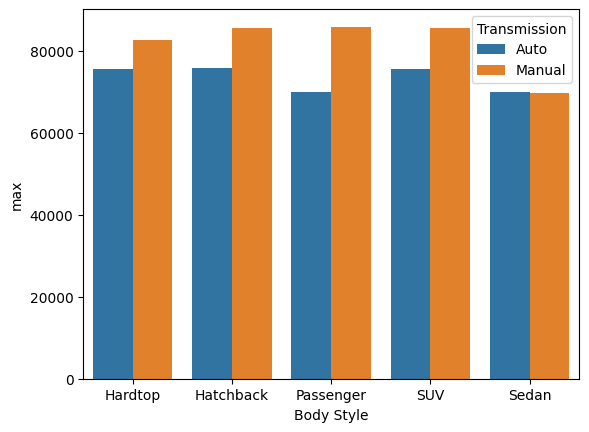

In [113]:
#> How does the car price distribution change when considering different combinations of body style and transmission typeE

aa=df.groupby(['Body Style','Transmission'])['Price ($)'].agg(['max','min','mean'])
sns.barplot(x='Body Style',y=('max'),data=aa,hue='Transmission')
aa

<Axes: xlabel='Body Style', ylabel='Price ($)'>

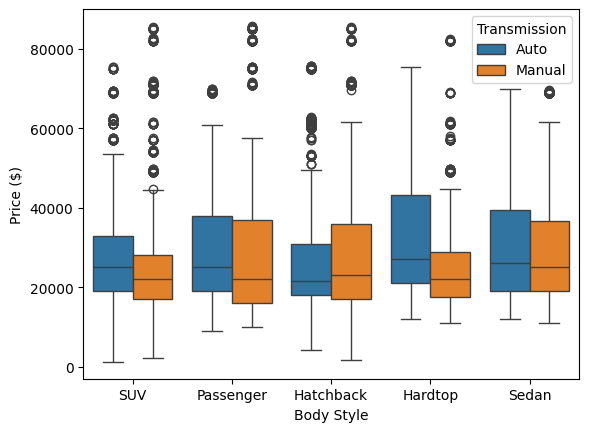

In [116]:
sns.boxplot(x='Body Style',y='Price ($)',data=df,hue='Transmission')

,Price ($),Engine,Annual Income
0,26000,1,13500
1,19000,1,1480000
2,31500,0,1035000
3,14000,0,13500
4,24500,1,1465000
...,...,...,...
23901,12000,0,13500
23902,16000,1,900000
23903,21000,0,705000
23904,31000,1,13500


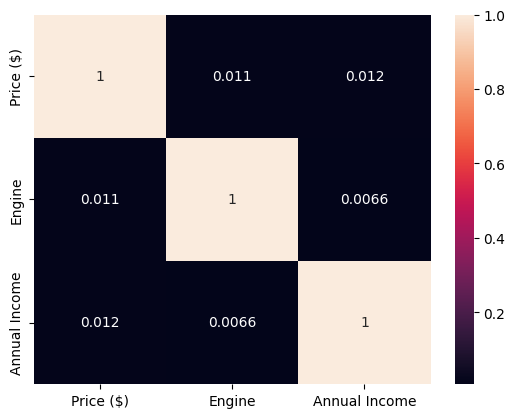

In [150]:
#= What is the correlation between car price, engine size, and annual income of customers, and how do these features interactE
df_col_for_corr=df[['Price ($)', 'Engine', 'Annual Income']]
df_col_for_corr
df_col_for_corr['Engine']=df_col_for_corr['Engine'].map({'DoubleÂ\xa0Overhead Camshaft':1,'Overhead Camshaft':0})
corr=df_col_for_corr.corr()

sns.heatmap(corr,annot=True)
df_col_for_corr

In [167]:
px.bar(x=aab['Model'],y=aab['Price ($)'],color=aab['Engine'])

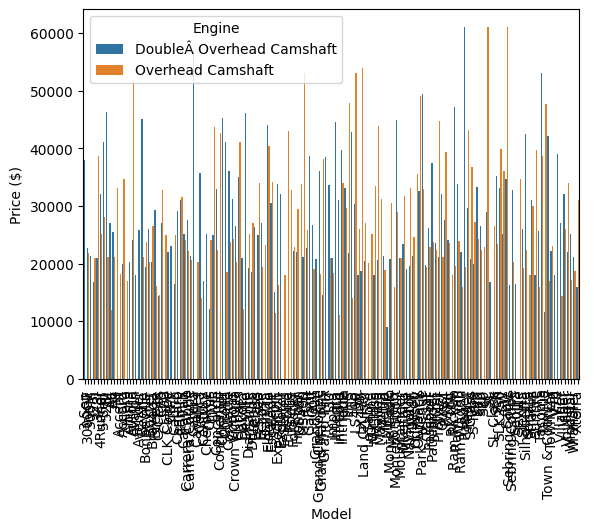

,Model,Engine,Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.380117
1,3000GT,DoubleÂ Overhead Camshaft,22764.326923
2,3000GT,Overhead Camshaft,21770.659864
3,300M,DoubleÂ Overhead Camshaft,21394.888889
4,323i,DoubleÂ Overhead Camshaft,16744.632287
...,...,...,...
256,Windstar,Overhead Camshaft,17100.272727
257,Wrangler,DoubleÂ Overhead Camshaft,21145.294737
258,Wrangler,Overhead Camshaft,18742.942029
259,Xterra,DoubleÂ Overhead Camshaft,15940.459459


In [162]:
#_^ How does the average car price vary across different car models and engine types?
aab=df.groupby(['Model','Engine'])['Price ($)'].mean().reset_index()
aab
sns.barplot(x='Model',y='Price ($)',data=aab,hue='Engine')
plt.xticks(rotation=90)
plt.show()
aab